In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [3]:
!pwd

/Users/jasjotsingh/codes/pandas-tutorial


In [4]:
trips_data = pd.read_csv("datasets/biketrip.csv")

In [5]:
trips_data.shape

(669959, 11)

In [6]:
trips_data = trips_data.dropna()

In [7]:
trips_data.shape

(661622, 11)

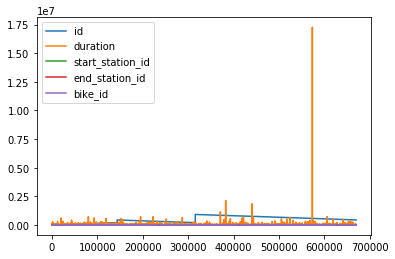

In [8]:
trips_data.plot() # default line plot with x- axis as row index number

In [9]:
trips_data['start_date'].describe() # for datetime type basic statistics are displayed

count              661622
unique             358171
top       10/14/2014 8:50
freq                   16
Name: start_date, dtype: object

In [10]:
trips_data['duration'].describe().round() # statistical measures of central tendency and variance are displayed

count      661622.0
mean         1078.0
std         22362.0
min            60.0
25%           343.0
50%           514.0
75%           749.0
max      17270400.0
Name: duration, dtype: float64

## Basic Histograms and Customized Histograms 

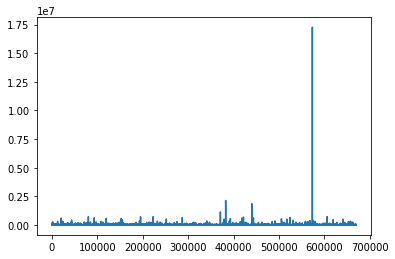

In [11]:
trips_data['duration'].plot() # pandas will interact with matplotlib  - default is linechart

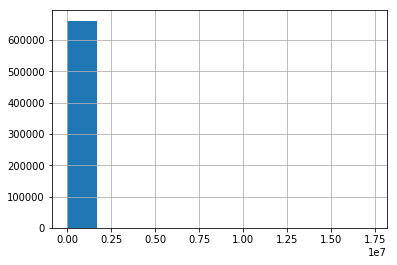

In [12]:
trips_data['duration'].hist() # displays histogram for duration of trips 
                              # press shift + enter when inside parenthesis followed by hist to see the 
                              # possible arguments of the hist attribute

In [13]:
# as it is observed that the data is verys skewed and maybe has outliers, we will remove outliers and then plot
reduced_trips_data = trips_data.loc[abs(trips_data.duration - trips_data.duration.mean()) <= (3*trips_data.duration.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'duration' using pandas indexing





In [14]:
reduced_trips_data.shape # not much outliers removed as data is not normally distributed 

(660934, 11)

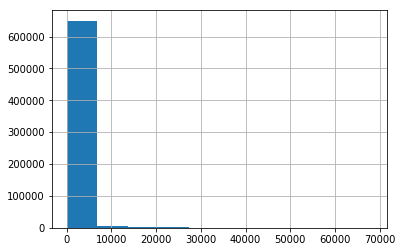

In [15]:
reduced_trips_data['duration'].hist() # still this does not help in obserbving the distribution of duration

In [16]:
trips_data['percentile'] = trips_data['duration'].rank(pct=True) # using rank method of pandas to assign percentile to each duration values
pct_95_trips_data= trips_data[trips_data['percentile']<=0.95] # to remove outliers, say, we accept to consider only 95% of the data observed

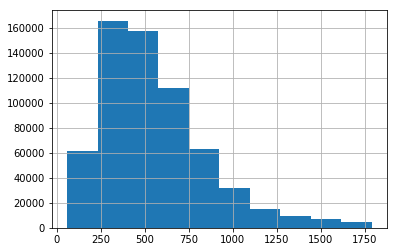

In [17]:
pct_95_trips_data.duration.hist() # now we can visualize the duration and make sense of it
plt.show() # to dsiplay the plot 
# It can be observed that maximum data points lie in the range 250-500 seconds of duration

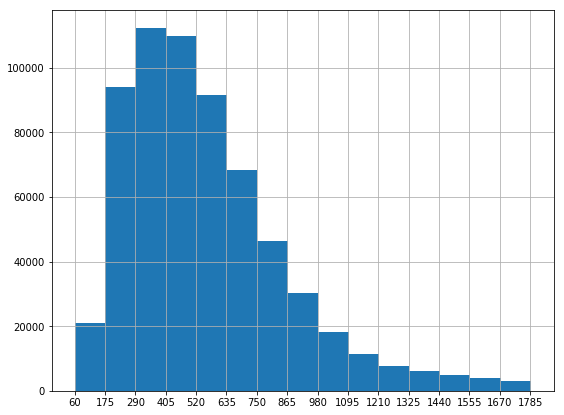

In [23]:

ax = pct_95_trips_data.duration.hist(bins=15, xlabelsize=10,figsize=(9,7)) # increased the number of bins to visualize with more granularity
                                            # set xlabelsize to and figure size make it legible
x_min = pct_95_trips_data.duration.min()
x_max = pct_95_trips_data.duration.max()
bin_size = (x_max - x_min)//15

xtick = [i for i in range(int(x_min),int(x_max),int(bin_size))] # to get list of bins 
ax.set_xticks( xtick ) # to set ticks for each bin
plt.show()
#Here we can say at a more granular level that max duration is between 290 and 405
# More arguments can be explored when you play around with histograms

## BOX PLOT

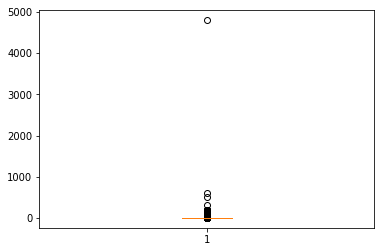

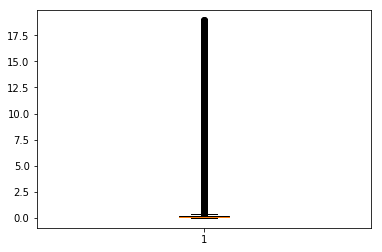

In [24]:
plt.boxplot(trips_data['duration']/3600) # convert to hours and we can observe that 
                                        # there are very small number of outliers on the higher side
plt.show()

plt.boxplot(reduced_trips_data['duration']/3600) # using outliers filtered dataset shows all 
                                            # the data lies between 0 and 20 hours duration
plt.show()

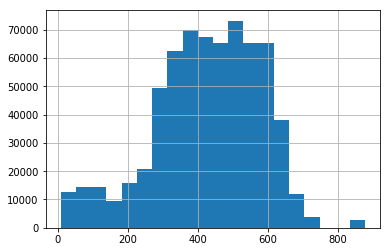

In [25]:
# To visualize the number of each bike type used in al the trips
trips_data['bike_id'].hist(bins=20)
plt.show()

## Visualizing 2 variables

In [26]:
# To visualize avg duration and no. of trips from each station
agg_trips_data = trips_data.groupby('start_station_id').agg({'id':'count','duration':['mean','sum']}).reset_index() # aggregatig data
agg_trips_data.columns= ['start_station_id','count','mean_duration','total_duration'] #to overwrite multi-column indexe with single index

In [27]:
agg_trips_data.head()

,start_station_id,count,mean_duration,total_duration
0,2,9503,917.457119,8718595.0
1,3,1547,4046.160310,6259410.0
2,4,3833,920.754761,3529253.0
3,5,1249,1131.907926,1413753.0
4,6,2895,1423.423489,4120811.0


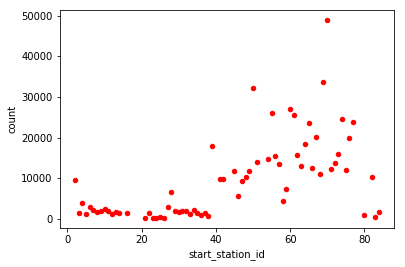

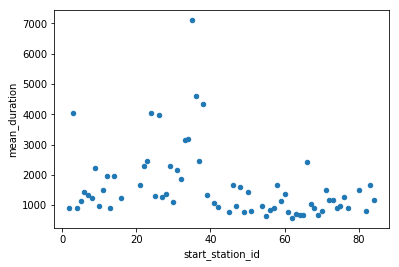

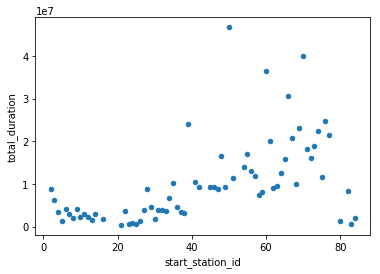

In [28]:
agg_trips_data.plot.scatter(x='start_station_id',y='count', s= 20, c= 'r')
# scetter plot, s = size of each point, c = color of each point
agg_trips_data.plot.scatter(x='start_station_id',y='mean_duration')

agg_trips_data.plot.scatter(x='start_station_id',y='total_duration')
# It can be observed that highest mean_duration per trip, total_duration 
# and no. of trips correspond to different start station IDs


In [29]:
trips_data['start_date'] = pd.to_datetime(trips_data['start_date'])
trips_data['weekday'] = trips_data['start_date'].dt.weekday

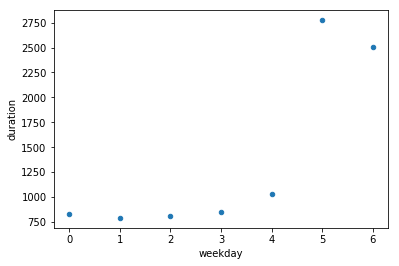

In [30]:
trips_data.groupby('weekday').duration.mean().reset_index().plot.scatter('weekday','duration')
plt.show() # It can be seen that average duration per trip is higher on weekends

In [36]:
weekday_agg = trips_data.groupby(['weekday','end_station_id']).duration.mean().reset_index()
weekday_agg.head() # each weekday, each end station id average duration per trip

,weekday,end_station_id,duration
0,0,2,552.548223
1,0,3,3730.955000
2,0,4,824.853571
3,0,5,612.134694
4,0,6,1298.606742


In [37]:
weekday_agg = weekday_agg[weekday_agg['end_station_id']<=15 ] # for sake of better visualization filtering for
                                                                # a sybset of end sation ids
                                                                

## Plotting 3 variables in 2-D

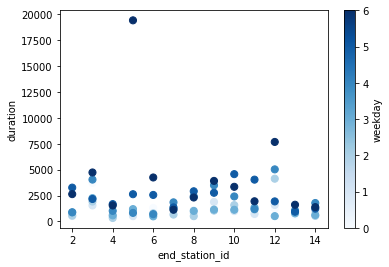

In [43]:
fig, ax = plt.subplots()

weekday_agg.plot(kind='scatter',x='end_station_id', y= 'duration', c='weekday', s= 50,cmap=plt.cm.Blues, ax=ax)

plt.show()
# Using colormap (cmap) to give color gradient to weekday number

## Visualizing weather data 

In [44]:
df_merge = pd.read_csv('df_merge.csv')

/Users/jasjotsingh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df_merge.head()

,Unnamed: 0,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code_y
0,0,4607,70,2013-08-29,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,...,29.966,10.0,10.0,10.0,17.8,7.4,21.6,4.2,325.8,94325
1,1,4130,71,2013-08-29,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,...,29.966,10.0,10.0,10.0,17.8,7.4,21.6,4.2,325.8,94325
2,2,4251,77,2013-08-29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,...,29.966,10.0,10.0,10.0,17.8,7.4,21.6,4.2,325.8,94325
3,3,4299,83,2013-08-29,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,...,29.966,10.0,10.0,10.0,17.8,7.4,21.6,4.2,325.8,94325
4,4,4927,103,2013-08-29,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,...,29.966,10.0,10.0,10.0,17.8,7.4,21.6,4.2,325.8,94325


In [46]:
df_merge.columns

Index(['Unnamed: 0', 'id_x', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code_x', 'id_y', 'name', 'lat',
       'long', 'dock_count', 'city', 'installation_date', 'date',
       'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'cloud_cover',
       'wind_dir_degrees', 'zip_code_y'],
      dtype='object')

In [47]:
# aggregate data
df_agg= df_merge.groupby('start_date').agg({'id_x':'count','mean_temperature_f':'mean','cloud_cover':'mean'}).reset_index()
# filter for dates
df_filter = df_agg[(df_agg['start_date']<='2013-09-30')&(df_agg['start_date']>='2013-09-01')]
# explicit typecast
df_filter['start_date'] = pd.to_datetime(df_filter['start_date'])

/Users/jasjotsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


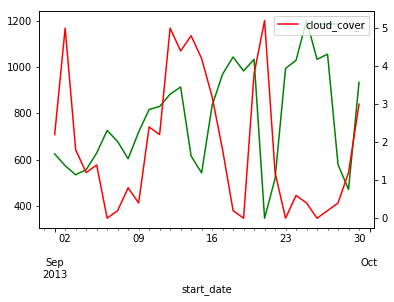

In [48]:
# to observe any trend between cloud cover and number of trips across start dates , 
# we plot with different scales in y-axis of same fig
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df_filter.plot(kind='line',x='start_date', y='id_x', ax=ax1,c='g')
df_filter.plot(kind='line',x='start_date', y='cloud_cover',ax=ax2,c='r')

plt.show()

## Summary
- plot, scatter, hist etc. can be directly applied to pandas dataframes
- aggregation by group by to generate respective statistical measures is done 
  and overall distribution can be seen by using the required visualization
- New columns are created like weekday, to aggregate and find some pattern in data via visualization


## Exercises

# Question
Find highest mean_duration per trip, total_duration 
and no. of trips for trip end stations? Are these station ids same as the ones calculated before for trip start station ids?

# Question
Find number of trips and average duration per trip for each bike id on each weekday via visualization?
Note:- Filter out for bike Ids less than 20 to get clear visualization
